In [137]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [138]:
df = pd.read_csv('archive/acs2015_census_tract_data.csv')
concat = False #change as needed
if concat:
    df = df.rename(columns={'CensusTract':'TractId'})
    newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})
    df = pd.concat([newdf, df])
df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [139]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [IncomePerCap]')
  plt.legend()
  plt.grid(True)

In [140]:
df = df.dropna()
df = df[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'IncomePerCap',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']]
train_dataset = df.sample(frac=0.9, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('IncomePerCap')
test_labels = test_features.pop('IncomePerCap')

df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,...,0.0,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0
1,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,...,0.0,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0
2,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,...,0.0,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0
3,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,...,0.0,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0
4,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,...,0.0,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0


In [141]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.asarray(train_features).astype('float32'))

In [142]:
ann_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=28, activation='relu'),
    # tf.keras.layers.Dense(units=14, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

Epoch 1/150
1179/1179 - 7s - loss: 86399704.0000 - val_loss: 48439464.0000 - 7s/epoch - 6ms/step
Epoch 2/150
1179/1179 - 5s - loss: 48147604.0000 - val_loss: 49170952.0000 - 5s/epoch - 4ms/step
Epoch 3/150
1179/1179 - 5s - loss: 46817340.0000 - val_loss: 44822844.0000 - 5s/epoch - 5ms/step
Epoch 4/150
1179/1179 - 3s - loss: 44780064.0000 - val_loss: 45773556.0000 - 3s/epoch - 3ms/step
Epoch 5/150
1179/1179 - 4s - loss: 43479508.0000 - val_loss: 43185828.0000 - 4s/epoch - 3ms/step
Epoch 6/150
1179/1179 - 5s - loss: 42365800.0000 - val_loss: 43432368.0000 - 5s/epoch - 4ms/step
Epoch 7/150
1179/1179 - 5s - loss: 41902172.0000 - val_loss: 44025344.0000 - 5s/epoch - 4ms/step
Epoch 8/150
1179/1179 - 5s - loss: 40705000.0000 - val_loss: 39723448.0000 - 5s/epoch - 4ms/step
Epoch 9/150
1179/1179 - 6s - loss: 39793212.0000 - val_loss: 42153388.0000 - 6s/epoch - 5ms/step
Epoch 10/150
1179/1179 - 4s - loss: 39515680.0000 - val_loss: 39765684.0000 - 4s/epoch - 3ms/step
Epoch 11/150
1179/1179 - 3s -

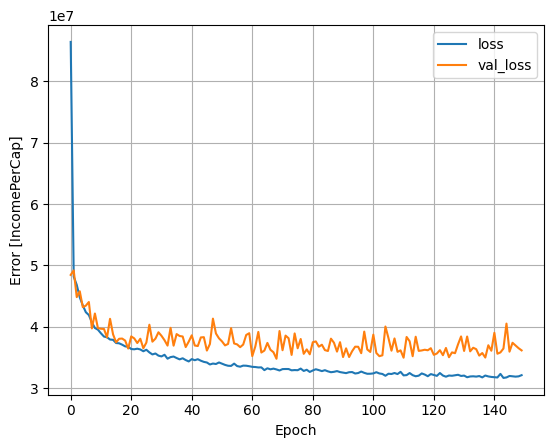

In [143]:
ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
    )

history = ann_model.fit(
    train_features,
    train_labels,
    epochs=150,
    batch_size=50,
    validation_split=0.1,
    verbose=2
)
plot_loss(history)

RESULTS:

-----------------------------------------

Using just 2015 data

1 layer  : 34435316.0000 MSE

2 layers : 32542424.0000 MSE (28, 14, 1)

2 layers : 31465028.0000 MSE (28,  7, 1)

3 layers : 33440750.0000 MSE

------------------------------------------

Using 2015 + 2017 data

1 layer  : 49900776.0000 MSE

2 layers : 36901260.0000 MSE (28, 14, 1)

2 layers : 37744916.0000 MSE (28,  7, 1)

3 layers : 40632372.0000 MSE

-----------------------------------------

Now how does the best model trained on 2015 data perform on the 2017 data?

In [144]:
newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})

In [145]:
def mse(y, y_prime, ignore_size_mismatch=False):
    if (len(y) != len(y_prime)) and not ignore_size_mismatch:
        print(len(y), len(y_prime))
        raise ValueError("Mismatched lengths")
    sum = 0
    for i in range(min(len(y), len(y_prime))):
        sum += (y[i] - y_prime[i])*(y[i] - y_prime[i])
    return (sum/min(len(y), len(y_prime)))[0]

In [146]:
y_prime = ann_model.predict(newdf[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']].dropna())
y = newdf['IncomePerCap'].dropna().to_numpy()
# print("Y:",y,"\nY':", y_prime)
# print(y.shape, y_prime.shape)
mse(y, y_prime, ignore_size_mismatch=True)

2283/2283 [==============================] - 8s 4ms/step


388957530.8658416

Decent! But still significantly worse than on the original dataset.

So where is the error the highest when using the old data to predict the new? Why?

In [147]:
from queue import PriorityQueue

def get_n_highest_error(df, model, n):
   y_prime = model.predict(df[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']].dropna())
   y = df['IncomePerCap'].dropna().to_numpy()
   error_q = PriorityQueue()
   for i in range(min(len(y), len(y_prime))):
      error = (y[i] - y_prime[i])*(y[i] - y_prime[i])
      error_q.put((error, i))
   max_error_rows = []
   for _ in range(n):
      max_error_rows.append(df.iloc[error_q.get()[1]])
   return pd.DataFrame(max_error_rows)


In [148]:
max_error_df = get_n_highest_error(df=newdf, model=ann_model, n=len(newdf)//4) #look at the top quarter most poorly predicted values
# print(max_error_df.head(10))
max_error_df_desc = max_error_df.describe()
newdf_desc = newdf.describe()
df_desc = df.describe()

2283/2283 [==============================] - 9s 4ms/step


But first, how does the 2017 data differ from the 2015 data?

In [149]:
df_minus_newdf = 100*(df_desc - newdf_desc)/(df_desc)
print("Percent change in value from 2015 to 2017")
df_minus_newdf.iloc[1]

Percent change in value from 2015 to 2017


Asian             -3.574975
Black             -0.374849
Carpool            3.414935
ChildPoverty            NaN
Citizen           -0.728458
Construction       0.785187
Drive              0.017708
Employed          -1.677136
FamilyWork        -0.622012
Hispanic          -2.330014
Income                  NaN
IncomeErr               NaN
IncomePerCap      -7.471870
IncomePerCapErr         NaN
MeanCommute       -1.426809
Men               -0.178896
Native            -1.533357
Office             2.083557
OtherTransp       -0.756946
Pacific           -2.487061
Poverty                 NaN
PrivateWork       -0.617113
Production        -0.112546
Professional      -2.183607
PublicWork         2.990662
SelfEmployed       0.838041
Service            1.061951
TotalPop          -0.026505
TractId                 NaN
Transit            0.836002
Unemployment            NaN
Walk              -1.152718
White              1.216423
Women              0.120703
WorkAtHome        -7.845344
Name: mean, dtype: f

Answer: They don't seem to differ too much - the largest differences are income per capita and the percentage of people working at home.

Now, let's see how the rows our 2015 model struggled with differ from the rest of the 2017 dataset.

In [153]:
error_minus_newdf = 100*(max_error_df_desc - newdf_desc)/(newdf_desc)
error_minus_newdf.iloc[1]

TractId            -5.530990
TotalPop            0.049897
Men                 0.047300
Women               0.052413
Hispanic           -9.470511
White               1.815356
Black               5.041243
Native             21.116975
Asian              -6.847796
Pacific             7.926745
Citizen             0.118785
Income             -2.166451
IncomeErr          -2.321219
IncomePerCap       -2.373505
IncomePerCapErr    -2.676421
Poverty             0.385377
ChildPoverty        1.313190
Professional       -2.025882
Service            -0.486485
Office             -0.182822
Construction        2.069326
Production          5.140217
Drive               1.024125
Carpool             1.473880
Transit           -11.256688
Walk               -4.567184
OtherTransp        -3.076166
WorkAtHome         -2.320708
MeanCommute        -1.261890
Employed           -0.255024
PrivateWork         0.182787
PublicWork         -0.405690
SelfEmployed       -1.503353
FamilyWork          2.949783
Unemployment  

In [159]:
state_df = pd.DataFrame(max_error_df.groupby('State').count()['TractId']/newdf.groupby('State').count()['TractId']).rename(columns={'TractId':'PercentageInHighErrorData'})
print(state_df.sort_values(by='PercentageInHighErrorData',ascending=False).head(10))

              PercentageInHighErrorData
State                                  
Alabama                        0.753599
Wyoming                        0.462121
Arizona                        0.404980
South Dakota                   0.400901
Arkansas                       0.377551
Mississippi                    0.373494
Wisconsin                      0.340667
Rhode Island                   0.323770
Hawaii                         0.319088
Indiana                        0.311714


Another way to see this...

In [155]:
import plotly.express as px
statenames_to_codes = pd.read_csv('archive/statenamestocodes.csv')
tmp = pd.merge(state_df, statenames_to_codes, on="State")
fig = px.choropleth(tmp,
                    locations='Abbreviation', 
                    locationmode="USA-states", 
                    color='PercentageInHighErrorData',
                    color_continuous_scale="Viridis_r", 
                    scope="usa")
fig.show()

ValueError: Value of 'animation_frame' is not the name of a column in 'data_frame'. Expected one of ['State', 'TractId', 'Abbreviation'] but received: period_begin

What on earth is up with Alabama?

In [152]:
df = pd.read_csv('archive/acs2015_census_tract_data.csv')
newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})

alabama_2015 = df[df['State']=='Alabama']
alabama_2017 = newdf[newdf['State']=='Alabama']

print((100*(alabama_2017.describe()-alabama_2015.describe())/alabama_2015.describe()).iloc[1,:])

Asian               2.226540
Black               1.134586
Carpool            -6.568011
CensusTract              NaN
ChildPoverty       -4.310358
Citizen             0.853909
Construction       -1.025833
Drive               0.611688
Employed            1.640884
FamilyWork          1.654646
Hispanic            2.540855
Income              6.101793
IncomeErr           7.908944
IncomePerCap        6.847178
IncomePerCapErr    10.717739
MeanCommute         1.013335
Men                 0.414892
Native             -0.262664
Office             -1.555397
OtherTransp         0.812540
Pacific           -16.336634
Poverty            -4.123328
PrivateWork         1.132186
Production          0.808438
Professional        1.618858
PublicWork         -4.967478
SelfEmployed       -1.577517
Service            -0.863786
TotalPop            0.417151
TractId                  NaN
Transit            -5.599436
Unemployment      -19.043713
Walk               -0.930205
White              -0.931712
Women         